In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 10
pd.options.display.max_columns = None

# Load the dataset
df_cs = pd.read_csv('v0_SPCapstone002  Capstone - Predictive.csv', low_memory=False)
dv = "\n---------------------"


In [2]:
# Data Shape, to know the number of rows and columns.
print(dv)
display(df_cs.shape)


---------------------


(132468, 9)

In [3]:
# View Data --- Head, to see the first few rows.
print(dv)
display(df_cs.head())


---------------------


,ID_UNQ,PUFC05_AGE,PUFURB2015,PUFC04_SEX,PUFC06_MSTAT,PUFC09_GRADTECH,PUFC09A_NFORMAL,PUFC07_GRADE,PUFNEWEMPSTAT
0,1211-1,76.0,Rural,Male,Widowed,no,No,GRADUATE,1.0
1,1211-2,37.0,Rural,Male,Married,no,No,GRADUATE,1.0
2,1222-2,31.0,Rural,Female,Married,no,No,GRADUATE,1.0
3,1211-4,35.0,Rural,Female,Married,no,No,UNDERGRADUATE,1.0
4,1234-5,34.0,Rural,Female,Single,no,No,GRADUATE,1.0


In [4]:
# View Data --- Tail, to see the last few rows.
print(dv)
display(df_cs.tail())


---------------------


,ID_UNQ,PUFC05_AGE,PUFURB2015,PUFC04_SEX,PUFC06_MSTAT,PUFC09_GRADTECH,PUFC09A_NFORMAL,PUFC07_GRADE,PUFNEWEMPSTAT
132463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Missing Values, to see if any data needs to be filled or cleaned.
print(dv)
display(df_cs.isnull().sum().sort_values(ascending=False))


---------------------


 ID_UNQ              53192
 PUFC05_AGE          53192
 PUFURB2015          53192
 PUFC04_SEX          53192
 PUFC06_MSTAT        53192
 PUFC09_GRADTECH     53192
 PUFC09A_NFORMAL     53192
 PUFC07_GRADE        53192
PUFNEWEMPSTAT        53192
dtype: int64

In [6]:
# Remove null/na values
df_cs_nonull = df_cs.dropna()
print(dv)
display(df_cs_nonull.isnull().sum().sort_values(ascending=False))



---------------------


 ID_UNQ              0
 PUFC05_AGE          0
 PUFURB2015          0
 PUFC04_SEX          0
 PUFC06_MSTAT        0
 PUFC09_GRADTECH     0
 PUFC09A_NFORMAL     0
 PUFC07_GRADE        0
PUFNEWEMPSTAT        0
dtype: int64

In [7]:
# View Data --- Tail, to see the last few rows.
print(dv)
display(df_cs_nonull.tail())


---------------------


,ID_UNQ,PUFC05_AGE,PUFURB2015,PUFC04_SEX,PUFC06_MSTAT,PUFC09_GRADTECH,PUFC09A_NFORMAL,PUFC07_GRADE,PUFNEWEMPSTAT
79271,17245-43189,20.0,Rural,Male,Single,no,No,UNDERGRADUATE,0.0
79272,17211-43224,26.0,Rural,Male,Married,no,No,UNDERGRADUATE,0.0
79273,17211-43703,46.0,Rural,Male,Married,no,No,UNDERGRADUATE,0.0
79274,17222-43703,40.0,Rural,Female,Married,no,No,UNDERGRADUATE,0.0
79275,172113-43712,39.0,Rural,Male,Single,no,No,GRADUATE,0.0


In [8]:
# Column Names,  to list the column names, which helps understand the features.
print(dv)
print(df_cs_nonull.columns)


---------------------
Index([' ID_UNQ ', ' PUFC05_AGE ', ' PUFURB2015 ', ' PUFC04_SEX ',
       ' PUFC06_MSTAT ', ' PUFC09_GRADTECH ', ' PUFC09A_NFORMAL ',
       ' PUFC07_GRADE ', 'PUFNEWEMPSTAT'],
      dtype='object')


In [9]:
# Trim whitespace from column names in the DataFrame
df_cs_nonull.columns = df_cs_nonull.columns.str.strip()
display(df_cs_nonull.columns)

Index(['ID_UNQ', 'PUFC05_AGE', 'PUFURB2015', 'PUFC04_SEX', 'PUFC06_MSTAT',
       'PUFC09_GRADTECH', 'PUFC09A_NFORMAL', 'PUFC07_GRADE', 'PUFNEWEMPSTAT'],
      dtype='object')

In [10]:
# Trim whitespace from string columns in the DataFrame
string_columns = df_cs_nonull.select_dtypes(include=['object']).columns

for column in string_columns:
    df_cs_nonull[column] = df_cs_nonull[column].str.strip()

C:\Users\user\AppData\Local\Temp\ipykernel_14768\2823226569.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs_nonull[column] = df_cs_nonull[column].str.strip()


In [11]:
print(dv)
display(df_cs_nonull.describe().round(2))
print(dv)
display(df_cs_nonull.describe().columns)


---------------------


,PUFC05_AGE,PUFNEWEMPSTAT
count,79276.00,79276.00
mean,40.02,0.92
std,14.27,0.28
min,15.00,0.00
25%,28.00,1.00
50%,39.00,1.00
75%,51.00,1.00
max,97.00,1.00



---------------------


Index(['PUFC05_AGE', 'PUFNEWEMPSTAT'], dtype='object')


---------------------
PUFNEWEMPSTAT
1.0    72645
0.0     6631
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_14768\3007075225.py:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(legend_texts, title="Legend", loc="best", bbox_to_anchor=(1, 0.5), labels=legend_labels)


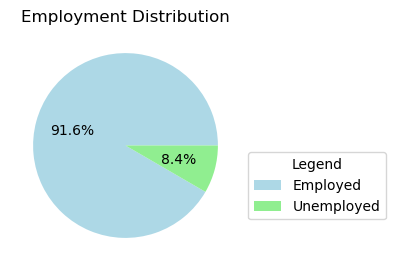

In [12]:
# Class Distribution
print(dv)
print(df_cs_nonull['PUFNEWEMPSTAT'].value_counts())

# Create a pie chart
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
class_counts = df_cs_nonull['PUFNEWEMPSTAT'].value_counts(normalize=True)*100
colors = ['lightblue', 'lightgreen']

plt.pie(class_counts, labels=['', ''], autopct='%1.1f%%', colors=colors)
plt.title('Employment Distribution')

# Create a custom legend
legend_labels = ['Employed', 'Unemployed']
legend_colors = colors
legend_texts = [f'{label}: {class_counts[i]:.1%}' for i, label in enumerate(legend_labels)]
plt.legend(legend_texts, title="Legend", loc="best", bbox_to_anchor=(1, 0.5), labels=legend_labels)

plt.show()

In [13]:
# Correlation, to check how columns are related.
numerical_columns = df_cs_nonull.select_dtypes(include=['int64', 'float64']).columns
df_cs_corr = df_cs_nonull[numerical_columns].corr()

# Find row and column names where the cell value is greater than 0.9 
# Excluding correlations where 'row' = 'column'
# Excluding repittion of row and column pairs
df_cs_corr_rows_column_names_p_nrows = 0  # Initialize a counter
df_cs_corr_rows_column_names_p = [
    (row, col) 
    for i, row in enumerate(df_cs_corr.index) 
    for j, col in enumerate(df_cs_corr.columns) 
#    if df_cs_corr.loc[row, col] > 0.9 and i < j
    if i < j
]
df_cs_corr_rows_column_names_p_nrows = len(df_cs_corr_rows_column_names_p)

# Sort the list based on the correlation value in descending order
df_cs_corr_rows_column_names_p_sorted = sorted(
    df_cs_corr_rows_column_names_p, 
    key=lambda x: df_cs_corr.loc[x[0], x[1]], 
    reverse=True
)

# Print the df_cs_corr_rows_column_names_positive
print(dv)
print(f'No. of Correlation Pairs (>0.9): {df_cs_corr_rows_column_names_p_nrows}')
print(dv)
for row, col in df_cs_corr_rows_column_names_p_sorted:
    value = df_cs_corr.loc[row, col]
    print(f"Row: {row.ljust(30)} \t Column: {col.ljust(30)} \t Value: {value:.2f}")



---------------------
No. of Correlation Pairs (>0.9): 1

---------------------
Row: PUFC05_AGE                     	 Column: PUFNEWEMPSTAT                  	 Value: 0.16


In [14]:
print(dv)
display(df_cs_nonull.info())


---------------------
<class 'pandas.core.frame.DataFrame'>
Index: 79276 entries, 0 to 79275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_UNQ           79276 non-null  object 
 1   PUFC05_AGE       79276 non-null  float64
 2   PUFURB2015       79276 non-null  object 
 3   PUFC04_SEX       79276 non-null  object 
 4   PUFC06_MSTAT     79276 non-null  object 
 5   PUFC09_GRADTECH  79276 non-null  object 
 6   PUFC09A_NFORMAL  79276 non-null  object 
 7   PUFC07_GRADE     79276 non-null  object 
 8   PUFNEWEMPSTAT    79276 non-null  float64
dtypes: float64(2), object(7)
memory usage: 6.0+ MB


None

In [15]:
# Do one-hot encoding on categorical columns with max 2 features.
columns_to_onehot = ['PUFC06_MSTAT','PUFC07_GRADE']
df_cs_dummies = pd.get_dummies(df_cs_nonull[columns_to_onehot]).astype(int)
display(df_cs_dummies.head())

,PUFC06_MSTAT_Annulled,PUFC06_MSTAT_Divorce/Separate,PUFC06_MSTAT_Married,PUFC06_MSTAT_Single,PUFC06_MSTAT_Unknown,PUFC06_MSTAT_Widowed,PUFC07_GRADE_GRADUATE,PUFC07_GRADE_NO GRADE COMPLETED,PUFC07_GRADE_UNDERGRADUATE
0,0,0,0,0,0,1,1,0,0
1,0,0,1,0,0,0,1,0,0
2,0,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,0,1,0,0


In [16]:
# Do label encoding on categorical columns with more than 2 features.
from sklearn.preprocessing   import LabelEncoder
df_cs_encoded_label = df_cs_nonull.copy()
columns_to_label = df_cs_nonull.drop(['PUFNEWEMPSTAT','ID_UNQ','PUFC05_AGE'] + columns_to_onehot, axis = 1).columns
label_encoder = LabelEncoder()

for col in columns_to_label:
    df_cs_encoded_label[col] = label_encoder.fit_transform(df_cs_encoded_label[col])
    
display(df_cs_encoded_label.head())

,ID_UNQ,PUFC05_AGE,PUFURB2015,PUFC04_SEX,PUFC06_MSTAT,PUFC09_GRADTECH,PUFC09A_NFORMAL,PUFC07_GRADE,PUFNEWEMPSTAT
0,1211-1,76.0,0,1,Widowed,0,0,GRADUATE,1.0
1,1211-2,37.0,0,1,Married,0,0,GRADUATE,1.0
2,1222-2,31.0,0,0,Married,0,0,GRADUATE,1.0
3,1211-4,35.0,0,0,Married,0,0,UNDERGRADUATE,1.0
4,1234-5,34.0,0,0,Single,0,0,GRADUATE,1.0


In [17]:
# Combine data from one-hot and label encoding
df_cs_encoded = pd.concat([df_cs_encoded_label.drop(columns = columns_to_onehot),df_cs_dummies], axis=1)
display(df_cs_encoded.head())

,ID_UNQ,PUFC05_AGE,PUFURB2015,PUFC04_SEX,PUFC09_GRADTECH,PUFC09A_NFORMAL,PUFNEWEMPSTAT,PUFC06_MSTAT_Annulled,PUFC06_MSTAT_Divorce/Separate,PUFC06_MSTAT_Married,PUFC06_MSTAT_Single,PUFC06_MSTAT_Unknown,PUFC06_MSTAT_Widowed,PUFC07_GRADE_GRADUATE,PUFC07_GRADE_NO GRADE COMPLETED,PUFC07_GRADE_UNDERGRADUATE
0,1211-1,76.0,0,1,0,0,1.0,0,0,0,0,0,1,1,0,0
1,1211-2,37.0,0,1,0,0,1.0,0,0,1,0,0,0,1,0,0
2,1222-2,31.0,0,0,0,0,1.0,0,0,1,0,0,0,1,0,0
3,1211-4,35.0,0,0,0,0,1.0,0,0,1,0,0,0,0,0,1
4,1234-5,34.0,0,0,0,0,1.0,0,0,0,1,0,0,1,0,0


In [18]:
#Splitting and Dropping of Data & Columns for Machine Learning
from sklearn.model_selection import train_test_split

X = df_cs_encoded.drop(columns = ['ID_UNQ','PUFNEWEMPSTAT'])
y = df_cs_encoded['PUFNEWEMPSTAT']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

print(dv)
print(f'df_cs: \t\t {df_cs_encoded.shape}')

print(dv)
print(f'X_train: \t {X_train.shape} \nX_test: \t {X_test.shape}')

print(dv)
print(f'y_train: \t {y_train.shape} \ny_test: \t {y_test.shape}')

print(dv)
display(y)

print(dv)
display(X)


---------------------
df_cs: 		 (79276, 16)

---------------------
X_train: 	 (59457, 14) 
X_test: 	 (19819, 14)

---------------------
y_train: 	 (59457,) 
y_test: 	 (19819,)

---------------------


0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
79271    0.0
79272    0.0
79273    0.0
79274    0.0
79275    0.0
Name: PUFNEWEMPSTAT, Length: 79276, dtype: float64


---------------------


,PUFC05_AGE,PUFURB2015,PUFC04_SEX,PUFC09_GRADTECH,PUFC09A_NFORMAL,PUFC06_MSTAT_Annulled,PUFC06_MSTAT_Divorce/Separate,PUFC06_MSTAT_Married,PUFC06_MSTAT_Single,PUFC06_MSTAT_Unknown,PUFC06_MSTAT_Widowed,PUFC07_GRADE_GRADUATE,PUFC07_GRADE_NO GRADE COMPLETED,PUFC07_GRADE_UNDERGRADUATE
0,76.0,0,1,0,0,0,0,0,0,0,1,1,0,0
1,37.0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,31.0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35.0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,34.0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79271,20.0,0,1,0,0,0,0,0,1,0,0,0,0,1
79272,26.0,0,1,0,0,0,0,1,0,0,0,0,0,1
79273,46.0,0,1,0,0,0,0,1,0,0,0,0,0,1
79274,40.0,0,0,0,0,0,0,1,0,0,0,0,0,1



---------------------
PUFNEWEMPSTAT
1.0    54505
0.0     4952
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_14768\405694498.py:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(legend_texts, title="Legend", loc="best", bbox_to_anchor=(1, 0.5), labels=legend_labels)


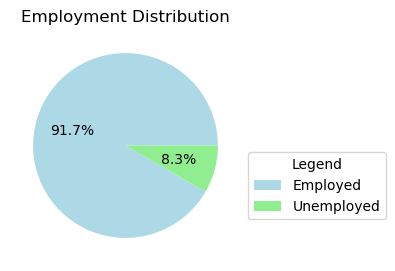

In [19]:
# Preprocessing - Unbalanced
# Class Distribution
print(dv)
print(y_train.value_counts())

# Create a pie chart
plt.figure(figsize=(3, 3))
class_counts = y_train.value_counts(normalize=True)*100
colors = ['lightblue', 'lightgreen']

plt.pie(class_counts, labels=['', ''], autopct='%1.1f%%', colors=colors)
plt.title('Employment Distribution')

# Create a custom legend
legend_labels = ['Employed', 'Unemployed']
legend_colors = colors
legend_texts = [f'{label}: {class_counts[i]:.1%}' for i, label in enumerate(legend_labels)]
plt.legend(legend_texts, title="Legend", loc="best", bbox_to_anchor=(1, 0.5), labels=legend_labels)

plt.show()


---------------------
PUFNEWEMPSTAT
1.0    54505
0.0    54505
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_14768\2946876657.py:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(legend_texts, title="Legend", loc="best", bbox_to_anchor=(1, 0.5), labels=legend_labels)


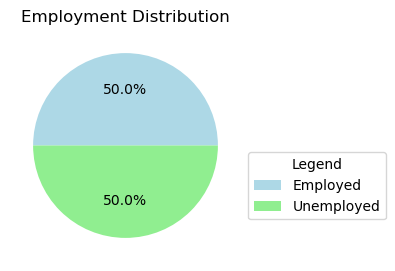

In [20]:
# Create an instance of SMOTE
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()

# Resample data
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

print(dv)
print(y_train_over.value_counts())

# Create a pie chart
plt.figure(figsize=(3, 3))
class_counts = y_train_over.value_counts(normalize=True)*100
colors = ['lightblue', 'lightgreen']

plt.pie(class_counts, labels=['', ''], autopct='%1.1f%%', colors=colors)
plt.title('Employment Distribution')

# Create a custom legend
legend_labels = ['Employed', 'Unemployed']
legend_colors = colors
legend_texts = [f'{label}: {class_counts[i]:.1%}' for i, label in enumerate(legend_labels)]
plt.legend(legend_texts, title="Legend", loc="best", bbox_to_anchor=(1, 0.5), labels=legend_labels)

plt.show()


###### Note:
##### • The current training and test datasets are outputs from the preprocessing.
##### • Dataset Proportion from Original Dataset: Train Size = 0.75, Test Size = 0.25
##### 
##### Current Training Datasets:
##### X_train_over
##### *** from X_train dataset that undergone one-hot and label encoding + unbalance SMOTE.
##### y_train_over
##### *** from y_train dataset that undergone unbalance SMOTE.
##### 
##### Current Test Dataset:
##### X_test
##### *** from X dataset that undergone one-hot and label encoding.
##### y_test
##### *** have not undergone any preprocessing.

In [44]:
# Test Set with the size of 0.25 from the Original Dataset was already extracted before scaling.
# Lacking is validation dataset which will be extracted from "X_train_over".
validation_size = 0.15
X_train_temp, X_validation, y_train_temp, y_validation = train_test_split(X_train_over, y_train_over, test_size=validation_size, random_state=10, stratify=y_train_over)


###### Updated:
##### Overall Training Datasets:
##### • X_train_temp;  *** from X_train_over
##### • y_train_temp;  *** from y_train_over
##### 
##### Overall Validation Datasets:
##### • X_validation
##### • y_validation
##### 
##### Overall Test Datasets:
##### • X_test
##### • y_test

In [45]:
# Initialize variables to keep track of the best score and corresponding parameters
best_score = 0
best_parameters = None

# Define the hyperparameter values to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Iterate over each combination of hyperparameters
from sklearn.linear_model import LogisticRegression
for C in param_grid['C']:
    for solver in param_grid['solver']:
        # Create a Logistic Regression model with the current hyperparameters
        clf = LogisticRegression(C=C, solver=solver, max_iter=1000)
        clf.fit(X_train_temp, y_train_temp)
        
        # Evaluate the model on the validation set
        score = clf.score(X_validation, y_validation)
        
        # If the current model's score is better than the previous best, update the best score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'Solver': solver}

# Print the best score and the corresponding best parameters
print(f"Hyperparameter for LogisticRegression using X_train_temp & y_train_temp")
print(dv)
print("Best Score: {:.2f}".format(best_score))
print("Best Parameters: {}".format(best_parameters))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Hyperparameter for LogisticRegression using X_train_temp & y_train_temp

---------------------
Best Score: 0.68
Best Parameters: {'C': 100, 'Solver': 'lbfgs'}


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [46]:
# Initialize variables to keep track of the best score and corresponding parameters
# This time, we will use X_train and y_train that had not undergone SMOTE
# To compare the score and parameters among the training sets
best_score = 0
best_parameters = None

# Define the hyperparameter values to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Iterate over each combination of hyperparameters
for C in param_grid['C']:
    for solver in param_grid['solver']:
        # Create a Logistic Regression model with the current hyperparameters
        clf = LogisticRegression(C=C, solver=solver, max_iter=1000)
        clf.fit(X_train, y_train)
        
        # Evaluate the model on the validation set
        score = clf.score(X_validation, y_validation)
        
        # If the current model's score is better than the previous best, update the best score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'Solver': solver}

# Print the best score and the corresponding best parameters
print(f"Hyperparameter for LogisticRegression using X_train & y_train")
print(f"*** have not undergone SMOTE")
print(dv)
print("Best Score: {:.2f}".format(best_score))
print("Best Parameters: {}".format(best_parameters))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

Hyperparameter for LogisticRegression using X_train & y_train
*** have not undergone SMOTE

---------------------
Best Score: 0.50
Best Parameters: {'C': 0.001, 'Solver': 'newton-cg'}


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


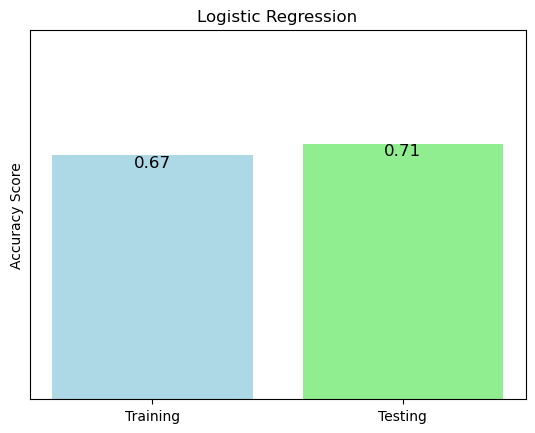

In [57]:
# Create a classification model and fit it to the training data
from sklearn.linear_model import LogisticRegression
lrc_a = LogisticRegression(C = 100, solver = 'lbfgs')
lrc_a.fit(X_train_temp, y_train_temp)

# Calculate the accuracy scores for the training and test sets
lrc_a_train_score = lrc_a.score(X_train_temp, y_train_temp)
lrc_a_test_score = lrc_a.score(X_test, y_test)

# Model scores
scores = [lrc_a_train_score, lrc_a_test_score]
labels = ['Training', 'Testing']

# Create the column chart
plt.bar(labels, scores, color=['lightblue', 'lightgreen'])
plt.ylabel('Accuracy Score')
plt.title('Logistic Regression')
plt.yticks([])
plt.ylim(0, 1.02)

# Display the scores on the columns
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='top', fontsize=12, color='black')

plt.show()

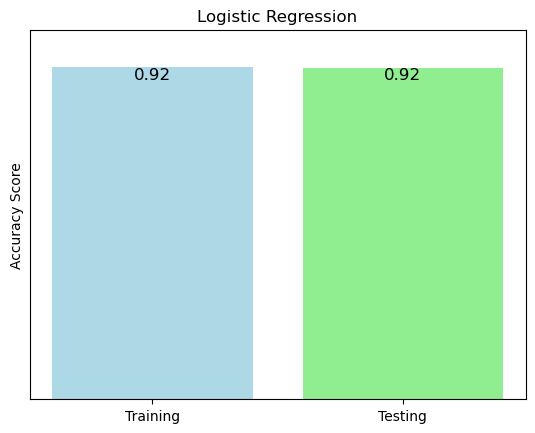

In [67]:
# Create a classification model and fit it to the training data
lrc_b = LogisticRegression(C = 0.001, solver = 'newton-cg')
lrc_b.fit(X_train, y_train)

# Calculate the accuracy scores for the training and test sets
lrc_b_train_score = lrc_b.score(X_train, y_train)
lrc_b_test_score = lrc_b.score(X_test, y_test)

# Model scores
scores = [lrc_b_train_score, lrc_b_test_score]
labels = ['Training', 'Testing']

# Create the column chart
plt.bar(labels, scores, color=['lightblue', 'lightgreen'])
plt.ylabel('Accuracy Score')
plt.title('Logistic Regression')
plt.yticks([])
plt.ylim(0, 1.02)

# Display the scores on the columns
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='top', fontsize=12, color='black')

plt.show()

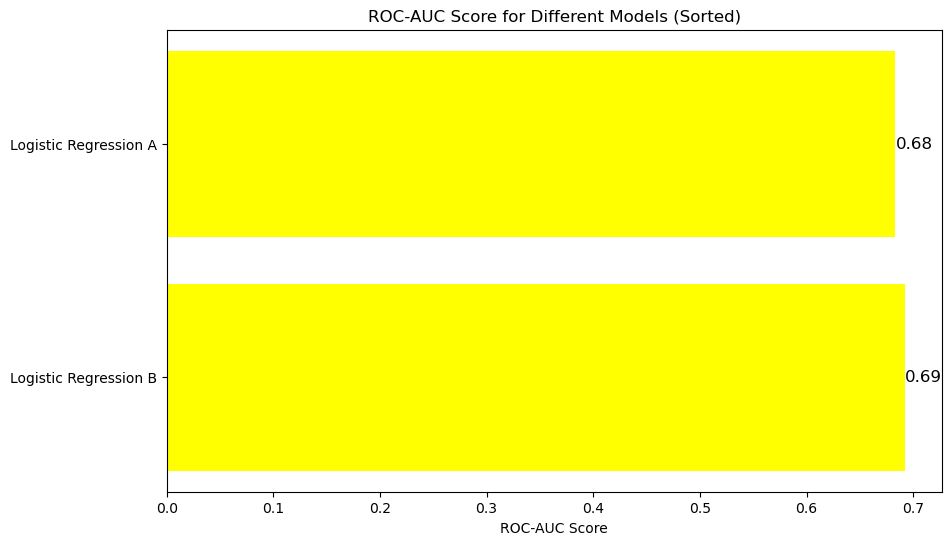

In [68]:
# ROC-AUC
from sklearn.metrics import roc_auc_score

auc_lrc_a = roc_auc_score(y_test, lrc_a.decision_function(X_test))
auc_lrc_b = roc_auc_score(y_test, lrc_b.decision_function(X_test))

# Find the model with the highest ROC-AUC score
model = np.array([
    ['Logistic Regression A', auc_lrc_a],
    ['Logistic Regression B', auc_lrc_b]
])

# Extract model names and accuracy scores
model_names = model[:, 0]
accuracy_scores = model[:, 1].astype(float)

# Sort the data based on accuracy scores in descending order
sorted_indices = np.argsort(accuracy_scores)[::-1]
model_names = model_names[sorted_indices]
accuracy_scores = accuracy_scores[sorted_indices]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color= 'Yellow')
plt.xlabel('ROC-AUC Score')
plt.title('ROC-AUC Score for Different Models (Sorted)')
plt.grid(axis='x', linestyle=' ', alpha=0.6)

# Display the accuracy scores on the bars
for i, accuracy in enumerate(accuracy_scores):
    plt.text(accuracy, i, f'{accuracy:.2f}', va='center', fontsize=12, color='black')

plt.show()


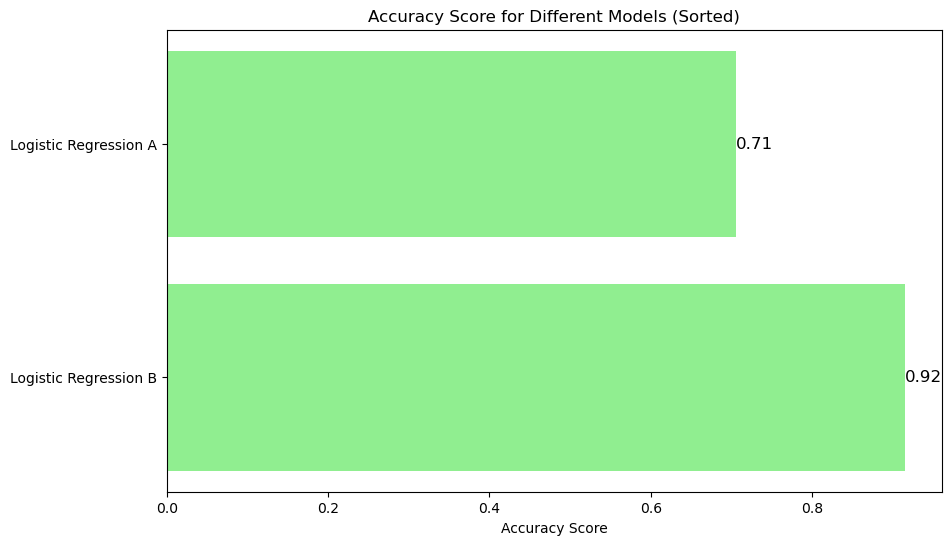

In [69]:
# Accuracy
from sklearn.metrics import accuracy_score

ac_lrc_a = accuracy_score(y_test, lrc_a.predict(X_test))
ac_lrc_b = accuracy_score(y_test, lrc_b.predict(X_test))

# Find the model with the highest ROC-AUC score
model = np.array([
    ['Logistic Regression A', ac_lrc_a],
    ['Logistic Regression B', ac_lrc_b],
])

# Extract model names and accuracy scores
model_names = model[:, 0]
accuracy_scores = model[:, 1].astype(float)

# Sort the data based on accuracy scores in descending order
sorted_indices = np.argsort(accuracy_scores)[::-1]
model_names = model_names[sorted_indices]
accuracy_scores = accuracy_scores[sorted_indices]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color='lightgreen')
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score for Different Models (Sorted)')
plt.grid(axis='x', linestyle=' ', alpha=0.6)

# Display the accuracy scores on the bars
for i, accuracy in enumerate(accuracy_scores):
    plt.text(accuracy, i, f'{accuracy:.2f}', va='center', fontsize=12, color='black')
    
plt.show()

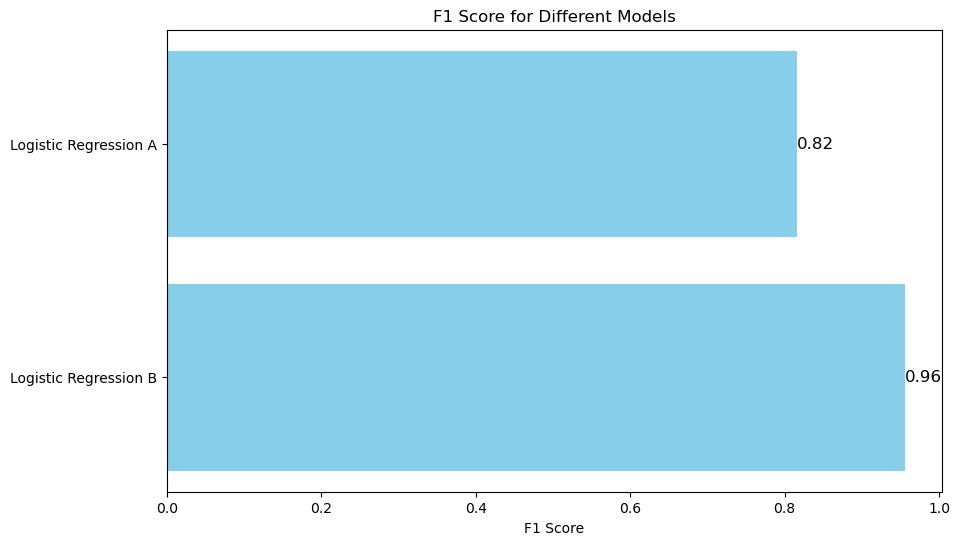

In [70]:
# F-1 Score

from sklearn.metrics import f1_score

fscore_lrc_a = f1_score(y_test, lrc_a.predict(X_test))
fscore_lrc_b = f1_score(y_test, lrc_b.predict(X_test))

# Find the model with the highest ROC-AUC score
model = np.array([
    ['Logistic Regression A', fscore_lrc_a],
    ['Logistic Regression B', fscore_lrc_b]
])

# Extract model names and F1 scores
model_names = model[:, 0]
fscores = model[:, 1].astype(float)

# Sort the data based on F1 scores in descending order
sorted_indices = np.argsort(fscores)[::-1]
model_names = model_names[sorted_indices]
fscores = fscores[sorted_indices]

# Bar chart
plt.figure(figsize=(10, 6))
plt.barh(model_names, fscores, color='skyblue')
plt.xlabel('F1 Score')
plt.title('F1 Score for Different Models')
plt.grid(axis='x', linestyle=' ', alpha=0.6)

# Display the F1 scores on the bars
for i, fscore in enumerate(fscores):
    plt.text(fscore, i, f'{fscore:.2f}', va='center', fontsize=12, color='black')

plt.show()

## OVERALL OUTPUT:
#### • Logistic Regression B performs better in ROC-AUC, ACCURACY and F-1 SCORE.
#### • Thus, decided to have Logistic Regression B to be used as the model for the dataset.

In [96]:
feature_names  = X.columns
feature_names.counts()

TypeError: 'tuple' object is not callable

In [71]:
# Assuming you have a list of feature names
feature_names  = X.columns

# Get the coefficients from your logistic regression model
coefficients = lrc_b.coef_[0]

# Create a DataFrame to pair feature names with coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficients': coefficients})

# Print the DataFrame
display(coefficients_df.T)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Feature,PUFC05_AGE,PUFURB2015,PUFC04_SEX,PUFC09_GRADTECH,PUFC09A_NFORMAL,PUFC06_MSTAT_Annulled,PUFC06_MSTAT_Divorce/Separate,PUFC06_MSTAT_Married,PUFC06_MSTAT_Single,PUFC06_MSTAT_Unknown,PUFC06_MSTAT_Widowed,PUFC07_GRADE_GRADUATE,PUFC07_GRADE_NO GRADE COMPLETED,PUFC07_GRADE_UNDERGRADUATE
Coefficients,0.037109,-0.120638,0.024962,-0.111429,-0.008405,0.000474,-0.022392,0.253376,-0.246681,0.000922,0.014301,-0.086958,-0.002904,0.089862


In [72]:
# Get the coefficients from your logistic regression model
coefficients = lrc_b.coef_[0]

# Create a DataFrame to store feature names and coefficients
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Print the DataFrame
print(coefficients_df.to_string(index=False))


                        Feature  Coefficient
                     PUFC05_AGE     0.037109
                     PUFURB2015    -0.120638
                     PUFC04_SEX     0.024962
                PUFC09_GRADTECH    -0.111429
                PUFC09A_NFORMAL    -0.008405
          PUFC06_MSTAT_Annulled     0.000474
  PUFC06_MSTAT_Divorce/Separate    -0.022392
           PUFC06_MSTAT_Married     0.253376
            PUFC06_MSTAT_Single    -0.246681
           PUFC06_MSTAT_Unknown     0.000922
           PUFC06_MSTAT_Widowed     0.014301
          PUFC07_GRADE_GRADUATE    -0.086958
PUFC07_GRADE_NO GRADE COMPLETED    -0.002904
     PUFC07_GRADE_UNDERGRADUATE     0.089862


In [84]:
import pandas as pd

# Create dictionaries to hold the value counts
before_encoding_counts = {}
after_encoding_counts = {}

# Collect value counts before one-hot encoding
for col in columns_to_onehot:
    value_counts = df_cs_nonull[col].value_counts()
    before_encoding_counts[col] = value_counts

# Collect value counts after one-hot encoding
for col in df_cs_dummies.columns:
    value_counts = df_cs_encoded[col].value_counts()
    after_encoding_counts[col] = value_counts

# Create DataFrames from the dictionaries
before_encoding_df_ = pd.DataFrame(before_encoding_counts)
after_encoding_df = pd.DataFrame(after_encoding_counts)

# Display the DataFrames
print(f'\033[1m*** Before One Hot Encoding\033[0m')
display(before_encoding_df)
print(f'\033[1m*** After One Hot Encoding\033[0m')
display(after_encoding_df)


*** Before One Hot Encoding


PUFC06_MSTAT  Married               49513
              Single                23352
              Widowed                3658
              Divorce/Separate       2731
              Unknown                  12
              Annulled                 10
PUFC07_GRADE  UNDERGRADUATE         50408
              GRADUATE              27699
              NO GRADE COMPLETED     1169
Name: count, dtype: int64

*** After One Hot Encoding


,PUFC06_MSTAT_Annulled,PUFC06_MSTAT_Divorce/Separate,PUFC06_MSTAT_Married,PUFC06_MSTAT_Single,PUFC06_MSTAT_Unknown,PUFC06_MSTAT_Widowed,PUFC07_GRADE_GRADUATE,PUFC07_GRADE_NO GRADE COMPLETED,PUFC07_GRADE_UNDERGRADUATE
0,79266,76545,29763,55924,79264,75618,51577,78107,28868
1,10,2731,49513,23352,12,3658,27699,1169,50408


In [82]:
before_label_encoding = {}
after_label_encoding = {}
    
for col in columns_to_label:
    before_label_encoding[col] = df_cs_nonull[col].value_counts()
    after_label_encoding[col] = df_cs_encoded[col].value_counts()
    
before_label_encoding_df = pd.DataFrame(before_label_encoding)
after_label_encoding_df = pd.DataFrame(after_label_encoding)

# Display the DataFrames
print(f'\033[1m*** Before Label Encoding\033[0m')
display(before_label_encoding_df.T)
print(f'\033[1m*** After Label Encoding\033[0m')
display(after_label_encoding_df)

*** Before Label Encoding


,Female,Male,No,Rural,Urban,Yes,no,yes
PUFURB2015,NaN,NaN,NaN,42035.0,37241.0,NaN,NaN,NaN
PUFC04_SEX,30751.0,48525.0,NaN,NaN,NaN,NaN,NaN,NaN
PUFC09_GRADTECH,NaN,NaN,NaN,NaN,NaN,NaN,74954.0,4322.0
PUFC09A_NFORMAL,NaN,NaN,78527.0,NaN,NaN,749.0,NaN,NaN


*** After Label Encoding


,PUFURB2015,PUFC04_SEX,PUFC09_GRADTECH,PUFC09A_NFORMAL
0,42035,30751,74954,78527
1,37241,48525,4322,749
